<img src="https://imgur.com/3U3hI1u.png" width="100%" />

#### Boas vindas a sua segunda e última tarefa de Aprendizado por Reforço!

Neste exercício, você deverá implementar e comparar diferentes algoritmos de **Aprendizado por Reforço Profundo** utilizando a biblioteca _[Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/)_.

A _Stable Baselines_ é uma biblioteca de Aprendizado por Reforço que implementa diversos algoritmos de agentes, além de várias funcionalidades úteis para seu treinamento. Suas implementações são bem simples e intuitivas, mas sem deixarem de ser otimizadas e poderosas, buscando facilitar o desenvolvimento de projetos de reforço de alta qualidade.

Antes de começar a tarefa, é importante acessar e se familiarizar com o tutorial da biblioteca disponível neste repositório! Depois de rodar o guia, você já estará capaz de completar este trabalho.

## Escolha do Ambiente

Antes de analisar o possíveis algoritmos, o primeiro passo é escolher qual ambiente você quer resolver! Para esta tarefa, separamos quatro possíveis ambientes diferentes, em ordem de dificuldade, que você poderá escolher: **Pong**, **Lunar Lander** e **Lunar Lander Continuous**. Lembrando que, quanto mais difícil um ambiente, mais demorado será o treinamento.

A seguir, estão as descrições de cada um deles:

<h2 align="center">Pong</h2>
<img src="https://imgur.com/vdVCmvo.gif" width=50% />

**Pong** é o ambiente de Aprendizado por Reforço criado pelo Turing que simula o jogo de *Pong*, no qual existem duas "raquetes" e uma bola, e o objetivo de cada uma das raquetes é não somente evitar que a bola passe por ela, como também fazer com que esta passe pela linha que a outra raquete protege.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 2 informações.

| Estado    | Informação                            |
| :-------- | :------------------------------------ |
| 0         | Distância _x_ entre a bola e o agente |
| 1         | Distância _y_ entre a bola e o agente |

Já o **Espaço de Ação** é composto por três ações: mover o jogador para cima, baixo, ou deixá-lo parado.

| Ação | Significado      |
| :--- | :--------------- |
| 0    | Ficar parado     |
| 1    | Mover para baixo |
| 2    | Mover para cima  |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência          | Recompensa |
| :------------------ | ---------: |
| Ponto do Agente     | $+500$     |
| Ponto do Oponente   | $-500$     |
| Vitória do Agente   | $+2000$    |
| Vitória do Oponente | $-2000$    |

O primeiro jogador a fazer quatro pontos ganha o jogo. Além disso, as recompensas são cumulativas. Isso significa que se o oponente fizer um ponto _e_ ganhar o jogo, a recompensa é de $-2500$.

### Instalação

Para instalar os ambientes criados pelo Turing, basta rodar o seguinte comando no notebook (se preferir, também pode rodar no terminal; é só tirar o ponto de exclamação do começo da linha):

In [ ]:
!pip install -U turing-envs

Com o ambiente do Turing instalado, podemos testar um modelo! Para isso, vamos precisar de 2 bibliotecas: **gym** (para inicialização dos ambientes) e **stable_baselines3** (para inicialização e avaliação dos modelos):

In [3]:
import gym 
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3 import PPO

# Definindo ambiente
env = gym.make("turing_envs:pong-normal-v0")

# Definindo modelo
model = PPO("MlpPolicy", env, seed=1, verbose=1)

# Avaliando o agente
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, deterministic=True)

print(f"Recompensa Média: {mean_reward:.2f} +/- {std_reward}")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Recompensa Média: -3900.00 +/- 200.0


<h2 align="center">Lunar Lander</h2>

<img src="https://raw.githubusercontent.com/fakemonk1/Reinforcement-Learning-Lunar_Lander/master/images/3.gif" width=50% />

**Lunar Lander** é um ambiente do Gym que simula o pouso de um módulo lunar na Lua. O agente deve controlar os três motores do módulo para guiá-lo até a pista de pouso, sem gastar muita energia.

### Características do Ambiente

O **Espaço de Observação** do ambiente é definido por 8 informações.

| Estado    | Informação                                     |
| :-------- | :--------------------------------------------- |
| 0         | Posição no eixo _x_ do módulo                  |
| 1         | Posição no eixo _y_ do módulo                  |
| 2         | Velocidade no eixo _x_ do módulo               |
| 3         | Velocidade no eixo _y_ do módulo               |
| 4         | Ângulo do módulo                               |
| 5         | Velocidade angular do módulo                   |
| 6         | Se a perna esquerda está em contato com o chão |
| 7         | Se a perna direita está em contato com o chão  |

Já o **Espaço de Ação** é composto por quatro ações: não fazer nada, acionar o motor esquerdo, acionar o motor principal ou acionar o motor direito.

| Ação | Significado             |
| :--- | :---------------------- |
| 0    | Não fazer nada          |
| 1    | Acionar motor esquerdo  |
| 2    | Acionar motor principal |
| 3    | Acionar motor direito   |

Por fim, cada vez que tomamos uma ação, recebemos do ambiente uma **recompensa**, conforme a tabela abaixo:

| Ocorrência              | Recompensa       |
| :---------------------- | ---------------: |
| Se aproximar da pista   | Até $+140$       |
| Pousar                  | $+100$           |
| Colidir                 | $-100$           |
| Tocar uma perna no chão | $+10$            |
| Acionar motor principal | $-0.3$ por frame |

#### Lunar Lander Continuous

Também existe uma versão contínua do ambiente do Lunar Lander, no qual podemos controlar a força que cada um dos motores do módulo exercerá. Nesse caso, teremos duas ações:

| Ação | Intervalo  | Significado                          |
| :--- | :--------: | :----------------------------------- |
| 0    | $-1$ a $+1$ | Força do motor principal             |
| 1    | $-1$ a $+1$ | Força dos motores esquerdo e direito |

Na versão contínua, os algoritmos que poderemos usar serão diferentes, e o treinamento provavlmente será mais difícil.

### Instalação

Para instalar os ambientes do Gym que usam a engine Box2D, é necessário rodar os seguintes comandos numa célula do notebook (se preferir, também pode rodar no terminal; é só tirar o ponto de exclamação do começo da linha):


**Windows**

In [ ]:
!conda install swig
!pip install box2d box2d-kengz

**Linux**

In [ ]:
!apt install swig
!pip install -u 'gym[box2d]'

Em seguida, para criar o ambiente, roda-se a linha de código a seguir:

In [4]:
env = gym.make("LunarLander-v2")

ou

In [5]:
env = gym.make("LunarLanderContinuous-v2")

### Exercício 1 - Testando Modelos

Caro piloto, agora que você conhece esses dois ambientes, é hora de brincar com eles. Você deverá testar diferentes algoritmos (a seu critério), e ver sua recompensa média. Para ver quais as limitações dos modelos, veja esse [link](https://stable-baselines3.readthedocs.io/en/master/guide/algos.html). Abaixo, criamos uma função que será útil para comparar os modelos posteriormente.

In [6]:
def getValues(model, env, n_episodes, info_dict):
    model_name = str(model.__class__).split(".")[-1][:-2]

    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    info_dict[model_name] = {}
    info_dict[model_name]["mean_reward"] = mean_reward
    info_dict[model_name]["std_reward"] = std_reward
    
    return info_dict

algorithms_dict = {}

#### Treinando e Avaliando seu próprio modelo - Lunar Lander

Primeiramente, agora você deve decidir em qual ambiente você deseja treinar seu agente. Para isto, basta tirar o comentário da linha referente ao ambiente escolhido:

In [7]:
# env_name = "turing_envs:pong-normal-v0"
env_name = "LunarLander-v2"
# env_name = "LunarLanderContinuous-v2"

Em seguida, você está livre para testar diferentes algoritmos para seu ambiente!

In [8]:
import os
# cria pasta de logs para todos os algoritmos
log_dir_lunar = "./logs-lunar/"
os.makedirs(log_dir_lunar, exist_ok=True)

In [17]:
from stable_baselines3 import DQN # Importe o modelo do stable_baselines3
from stable_baselines3.common.monitor import Monitor

# Cria pasta de logs
log_dir_dqn = "logs-lunar/logs-dqn/"
os.makedirs(log_dir_dqn, exist_ok=True)

# Definindo o ambiente
env = gym.make(env_name)
env = Monitor(env, log_dir_dqn)

model = DQN("MlpPolicy", env, seed = 3, verbose = 1) # Defina o modelo
model.learn(total_timesteps = 500_000) # Treine o modelo
n_episodes = 200 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.8     |
|    ep_rew_mean      | -280     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4285     |
|    time_elapsed     | 0        |
|    total_timesteps  | 359      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.8     |
|    ep_rew_mean      | -268     |
|    exploration_rate | 0.987    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4437     |
|    time_elapsed     | 0        |
|    total_timesteps  | 686      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.2     |
|    ep_rew_mean      | -214     |
|    exploration_rate | 0.981    |
| t

In [10]:
from stable_baselines3 import A2C # Importe o modelo do stable_baselines3

# Cria pasta de logs
log_dir_a2c = "logs-lunar/logs-a2c/"
os.makedirs(log_dir_a2c, exist_ok=True)

# Definindo o ambiente
env = gym.make(env_name)
env = Monitor(env, log_dir_a2c)

model = A2C("MlpPolicy", env, seed = 3, verbose = 1) # Defina o modelo
model.learn(total_timesteps = 500_000) # Treine o modelo
n_episodes = 200 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

Using cpu device
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 96.2     |
|    ep_rew_mean        | -363     |
| time/                 |          |
|    fps                | 905      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.04    |
|    explained_variance | 0.0124   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -18.5    |
|    value_loss         | 499      |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 116      |
|    ep_rew_mean        | -406     |
| time/                 |          |
|    fps                | 977      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps   

In [11]:
from stable_baselines3 import PPO # Importe o modelo do stable_baselines3

# Cria pasta de logs
log_dir_ppo = "logs-lunar/logs-ppo/"
os.makedirs(log_dir_ppo, exist_ok=True)

# Definindo o ambiente
env = gym.make(env_name)
env = Monitor(env, log_dir_ppo)

model = PPO("MlpPolicy", env, seed = 3, verbose = 1) # Defina o modelo
model.learn(total_timesteps = 500_000) # Treine o modelo 
n_episodes = 200 # Defina o número de episódios

# Avaliando o agente e guardando o desempenho no dicionário
algorithms_dict = getValues(model, env, n_episodes, algorithms_dict)

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 101      |
|    ep_rew_mean     | -178     |
| time/              |          |
|    fps             | 1747     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 105          |
|    ep_rew_mean          | -195         |
| time/                   |              |
|    fps                  | 1286         |
|    iterations           | 2            |
|    time_elapsed         | 3            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0037112664 |
|    clip_fraction        | 0.0113       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    e

A seguir, detalhe um pouco mais quais foram os algoritmos testados bem como a performance obtida por cada um.

Este detalhamento pode ser feito por meio de um ou mais gráficos mostrando o desempenho dos modelos, ou simplesmente por texto.

In [ ]:
### Espaço para o Piloto criar gráficos ou textos para mostrar os diferentes resultados entre modelos

Vamos observar os resultados numéricos de cada modelo após os treinamentos e, depois, fazer uso de uma visualização gráfica para avaliar mais detalhadamente a performance de cada algoritmo.

In [18]:
algorithms_dict

{'DQN': {'mean_reward': -32.069718955, 'std_reward': 97.57519573381914},
 'A2C': {'mean_reward': -16.250498455000002, 'std_reward': 122.73331155702192},
 'PPO': {'mean_reward': 41.702376905, 'std_reward': 130.43975092616074}}

In [13]:
from stable_baselines3.common import results_plotter
import matplotlib.pyplot as plt

def plot_results(log_folder, window=10, title="Curva de Aprendizado"):
    """
    Plota os resultados.

    :param log_folder: (str) diretório dos resultados a serem plotados
    :param window: (int) tamanho da janela da média móvel
    :param title: (str) título do plot
    """
    # Obtém os resultados
    results = results_plotter.load_results(log_folder)
    x, y = results_plotter.ts2xy(results, "timesteps")
    
    # Calcula a média móvel do retorno
    y_smoothed = results_plotter.rolling_window(y, window=window).mean(axis=1)
    
    # Plota os resultados
    fig = plt.figure(title, figsize=(10, 5))
    plt.scatter(x, y, s=2)
    plt.plot(x[window-1:], y_smoothed, color="darkblue", label="Média Móvel")
    plt.xlabel("Timesteps")
    plt.ylabel("Retorno Médio")
    plt.title(title)
    plt.legend()
    plt.show()

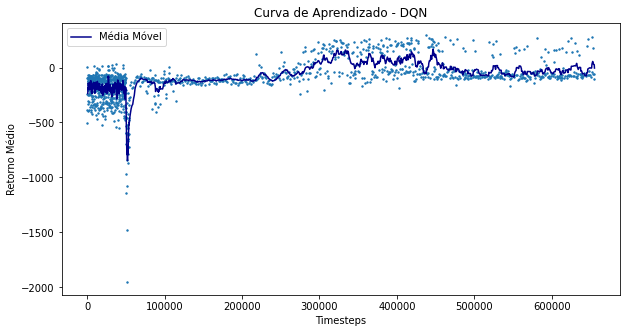

In [19]:
plot_results(log_dir_dqn, title = "Curva de Aprendizado - DQN")

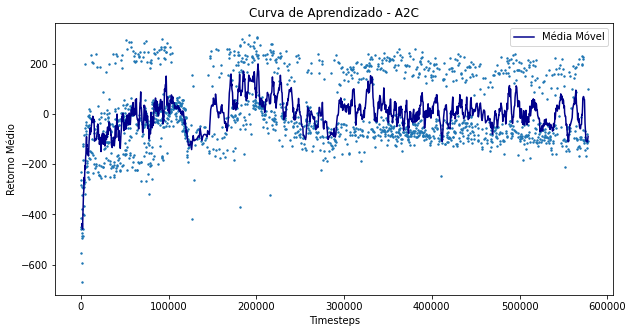

In [15]:
plot_results(log_dir_a2c, title = "Curva de Aprendizado - A2C")

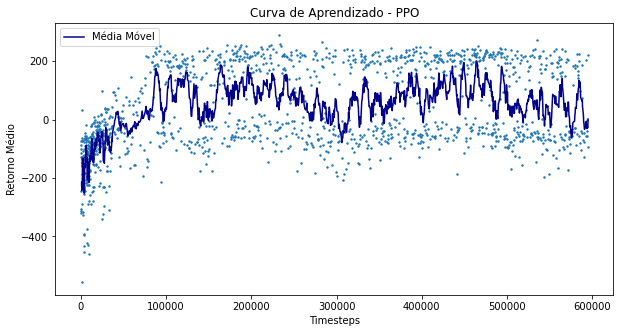

In [16]:
plot_results(log_dir_ppo, title = "Curva de Aprendizado - PPO")

Ao observar os resultados de cada modelo após os treinamentos, o destaque foi para o PPO (Proximal Policy Optimization), que, apesar de ter apresentado o maior desvio padrão, obteve o maior retorno médio, com 41.7 pontos. 

O algoritmo DQN (Deep Q Learning) obteve a curva de aprendizado mais estável entre os três e, portanto, o desvio padrão mais baixo, porém com a menor média de pontuação de apenas -32 pontos. 

A curva de aprendizado do modelo A2C (Advantage Actor Critc) também se mostrou muito oscilante, com as pontuações variando de -200 a +200 pela maior parte do treinamento, sem estabilizar em nenhum momento. Assim, seu retorno médio foi de -16.3 pontos com um alto desvio padrão.

### Escolha do Algoritmo

Após testar e analisar diversos algoritmos diferentes, qual foi o escolhido?

_Pergunta Extra:_ você usou algum critério para escolher quais algoritmos seriam testados?

In [ ]:
### Qual foi o algoritmo escolhido?


### Exercício 2 - Mudança de Hiperparâmetros

No segundo exercício, você deve testar diferentes hiperparâmetros para seu modelo escolhido!

Todos os modelos da Stable Baselines têm diversos parâmetros detalhados em sua documentação ([exemplo: PPO](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#parameters)) que podem ser modificados para alterar o modelo.

Para modificar os parâmetros de um algoritmo, tal como o ```PPO(...)```, basta especificá-los durante a construção do modelo, da seguinte forma:

In [ ]:
model = PPO("MlpPolicy", env, seed=1, verbose=1,
           learning_rate=0.0007, gamma=0.9) # Especificando diferentes valores para a learning_rate e para o gamma

Se quiser, você também pode alterar a arquitetura das redes neurais do modelo, da seguinte forma:

In [ ]:
import torch
import inspect

# Parâmetros das redes neurais
policy_kwargs = dict(activation_fn=torch.nn.ReLU,                # Troca a função de ativação para ReLU
                     net_arch=[dict(pi=[32, 32], vf=[32, 32])])  # Define a arquitetura das redes do Actor-Critic

# Cria o nosso modelo com os novos parâmetros
model = PPO("MlpPolicy", env, seed=1, verbose=1, 
            policy_kwargs=policy_kwargs) # Especificando outra arquitetura de rede

Caso queira ler um pouco mais sobre essas diferentes arquiteturas, recomendamos [a seguinte página da documentação da biblioteca.](https://stable-baselines3.readthedocs.io/en/master/guide/custom_policy.html)

A seguir, preparamos uma outra função útil para guardar os parâmetros testados:

In [ ]:
def getValuesAndParams(model, env, n_episodes, info_dict):
    
    model_name = model.__class__.__name__
    env_name = env.unwrapped.__class__.__name__
    
    mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=n_episodes, deterministic=True)
    
    args = inspect.getfullargspec(model.__class__).args
    func_params_dict = {}
    for arg in args:
        p = model.__dict__.get(arg)
        if type(p) in [None, int, float, str, dict]:
            func_params_dict[arg] = p
    
    
    if model_name not in info_dict:
        info_dict[model_name] = {}
        
    if "env" not in info_dict[model_name]:
        info_dict[model_name]["env"] = []
        
    info_dict[model_name]["env"].append(env_name)
        
    if "mean_reward" not in info_dict[model_name]:
        info_dict[model_name]["mean_reward"] = []
        info_dict[model_name]["std_reward"] = []
        
    if "class_args" not in info_dict[model_name]:
        info_dict[model_name]["class_args"] = []
        
    info_dict[model_name]["mean_reward"].append(mean_reward)
    info_dict[model_name]["std_reward"].append(std_reward)
    info_dict[model_name]["class_args"].append(func_params_dict)
    
    params_dict = model.get_parameters()
    if "policy.optimizer" not in params_dict:
        if "actor.optimizer" not in info_dict[model_name]:
            info_dict[model_name]["actor.optimizer"] = []
            info_dict[model_name]["critic.optimizer"] = []

        info_dict[model_name]["actor.optimizer"] += params_dict["actor.optimizer"]["param_groups"]
        info_dict[model_name]["critic.optimizer"] += params_dict["critic.optimizer"]["param_groups"]
    
    else:
        if "policy.optimizer" not in info_dict[model_name]:
            info_dict[model_name]["policy.optimizer"] = []
    
        info_dict[model_name]["policy.optimizer"] += params_dict["policy.optimizer"]["param_groups"]
    
    return info_dict

parameters_dict = {}

A seguir, você está livre para testar diferentes hiperparâmetros para o algoritmo escolhido! Você deve testar valores diversos para pelo menos **dois** parâmetros. Se quiser algumas sugestões, recomendamos realizar testes no `gamma`, na `learning_rate` ou na arquitetura da rede neural do modelo.

In [ ]:
from stable_baselines3 import ... # Importe o modelo do stable_baselines3

# Definindo o ambiente
env = ...

model = ... # Defina o modelo
model.learn(total_timesteps=...) # Treine o modelo
n_episodes = ... # Defina o número de episódios

# Avaliando o agente
parameters_dict = getValuesAndParams(model, env, n_episodes, parameters_dict)

In [ ]:
### Espaço livre para a comparação dos hiperparâmetros
